# Real or Fake News Analysis

## Importing Data and Libraries

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading Dataset

In [2]:
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [3]:
true_df.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",NaN,NaN,NaN,NaN
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",NaN,NaN,NaN,NaN
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",NaN,NaN,NaN,NaN
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",NaN,NaN,NaN,NaN
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",NaN,NaN,NaN,NaN


In [4]:
fake_df.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Extra Columns

In [5]:
true_df = true_df.iloc[:,0:4]
fake_df = fake_df.iloc[:,0:4]

In [6]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Data Preprocessing

### Initial Inspection

In [8]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


**Key Insights:**
- The DataFrame contains 21,417 entries (rows) and 4 columns (features).
- All columns are of type object, indicating that they contain textual data.
- All columns have non-null counts equal to the total number of entries (21,417), indicating that there are no missing values in the dataset.
- There are no inconsistency in the Data type.

In [9]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23504 non-null  object
 1   text     23502 non-null  object
 2   subject  23481 non-null  object
 3   date     23480 non-null  object
dtypes: object(4)
memory usage: 734.6+ KB


**Key Insights**
- The DataFrame contains 23,504 entries (rows) and 4 columns (features).
- All columns are of type object, indicating that they contain textual data.
- The presence of missing values in the text, subject, and date columns indicates that there may be some inconsistencies or gaps in the data. 

**Columns Information**
- **Title :-** Title Column contains title of the News.
- **Text :-**  Text Column contains the detailed news.
- **Subject :-** Subject Column contains category/genre of the news.
- **Date :-** Date Column contains the date of the news.

### Adding label column in True and Fake Dataframe 
- label = 0 for Fake news
- label = 1 for True news

In [10]:
true_df['label'] = 1
fake_df['label'] = 0

### Combining both datasets (Fake and True) into single dataframe

In [11]:
news_df = pd.concat([fake_df, true_df], ignore_index= True)
news_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Checking Missing Values

In [12]:
news_df.isnull().sum()

title       0
text        2
subject    23
date       24
label       0
dtype: int64

**Key Insights :**
- There are few missing values in `text`, `subject`, `date` columns which is less than 1 % .

**Next Step**
- So we will drop the rows with missing values instead of imputation.

### Dropping missing values

In [13]:
# Dropping missing values
news_df.dropna(axis= 0, inplace= True)

In [14]:
# Varifying Missing value after dropping
news_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

### Checking for Duplicated rows

In [15]:
news_df.duplicated().sum()

229

### Removing Duplicated records

In [16]:
news_df.drop_duplicates(inplace= True)

In [17]:
# Varifying after removing duplicates
news_df.duplicated().sum()

0

## Exploratory Data Analysis

### Importing Libraries

In [18]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

### Descriptive analysis

In [19]:
news_df.describe(include= 'object')

,title,text,subject,date
count,44668,44668,44668,44668
unique,38728,38645,31,2420
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 6, 2017"
freq,14,627,11219,166


**Key Insights :-**

1. **Dataset Size**: 
   - There are 44,668 records in the dataset across four columns: `title`, `text`, `subject`, and `date`.

2. **Unique Values**:
   - The `title` column contains 38,728 unique values, indicating that some articles may share the same title.
   - The `text` column has 38,645 unique entries, suggesting a slight overlap or repetition in content.
   - The `subject` column includes only 31 unique values, pointing to a small variety of subjects covered in the dataset.
   - The `date` column shows 2,420 unique entries, indicating that the dataset spans multiple dates, likely with multiple articles per day.

3. **Most Frequent Entries**:
   - The most common title, *"Factbox: Trump fills top jobs for his administration..."*, appears 14 times.
   - The most frequent subject, *politicsNews*, is associated with 11,219 records, showing a strong focus on political news.
   - The most common date, *December 6, 2017*, accounts for 166 articles, suggesting it was a significant day for content generation in this dataset.

4. **Potential Redundancy**:
   - The relatively low number of unique values in the `title` and `text` columns compared to the total count indicates possible duplicate or near-duplicate records.

5. **Categorical Analysis**:
   - The `subject` column's limited variety suggests that the dataset could be well-suited for classification tasks if balanced across categories.

6. **Temporal Distribution**:
   - With multiple articles associated with individual dates, temporal trends could be analyzed to understand content production over time.

### Distribution of Real and Fake News

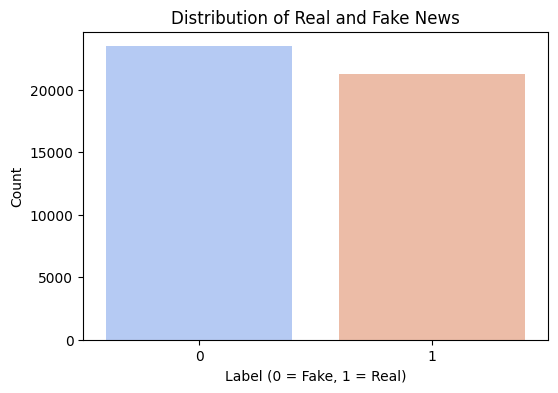

In [20]:
# Distribution of Real vs Fake News
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=news_df, palette='coolwarm')
plt.title('Distribution of Real and Fake News')
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Count')
plt.show()

### Text length analysis for real and fake news

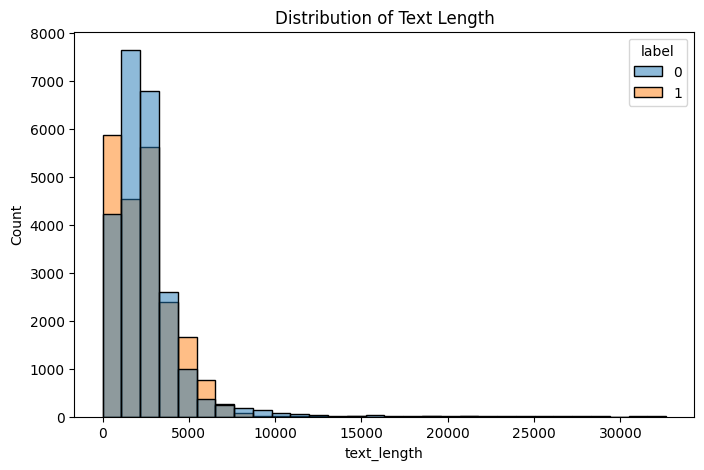

In [21]:
# Text length analysis
news_df['text_length'] = news_df['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data=news_df, x='text_length', hue='label', bins=30, kde=False)
plt.title("Distribution of Text Length")
plt.show()

**Insights :-**

1. **Fake News (Label 0)**:
   - Articles labeled as fake news tend to have a higher density of shorter text lengths compared to real news. This could imply that fake news is often more concise or lacks detailed content.

2. **Real News (Label 1)**:
   - Real news articles appear slightly longer on average, potentially due to more detailed reporting and thorough content.

3. **Overlap Analysis**:
   - The overlap in text lengths indicates that length alone is not a definitive factor for distinguishing fake news from real news. Additional features (e.g., sentiment, word frequency, source credibility) may be required to improve classification accuracy.

### Sentiment Analysis

In [22]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_df['sentiment'] = news_df['text'].apply(calculate_sentiment)

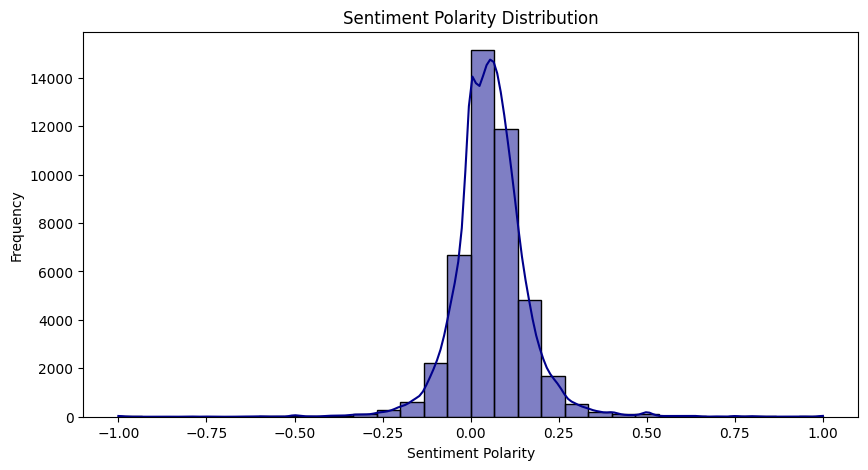

In [23]:
# Visualising sentiment scores
plt.figure(figsize= (10,5))
sns.histplot(news_df['sentiment'], bins=30, kde=True, color='darkblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

### N- Gram Analysis

#### Defining Function for N- Gram Analysis

In [24]:
# N-Gram Analysis
def plot_top_ngrams(corpus, n=2, top_n=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    ngram_df = pd.DataFrame(words_freq, columns=['Ngram', 'Frequency'])
    sns.barplot(x='Frequency', y='Ngram', data=ngram_df, palette='viridis')
    if n <= 2:
        plt.title(f'Top {top_n} Bi-grams')
    else:
        plt.title(f'Top {top_n} Tri-grams')
    plt.show()

#### Top - 20 Bi-Grams

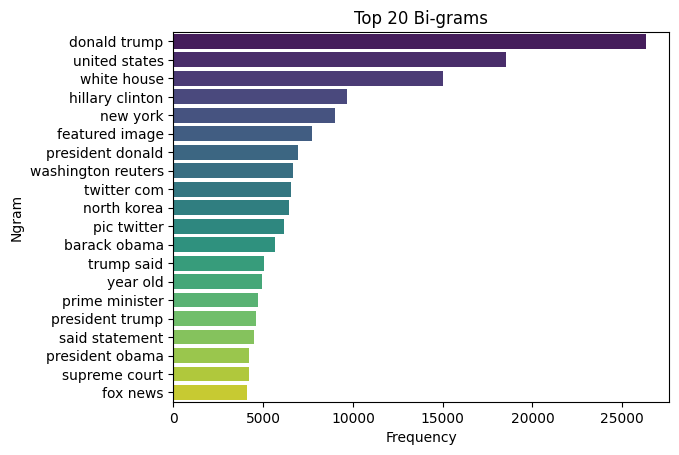

In [25]:
plot_top_ngrams(news_df['text'], n=2, top_n=20)

#### Top - 20 Tri-Grams

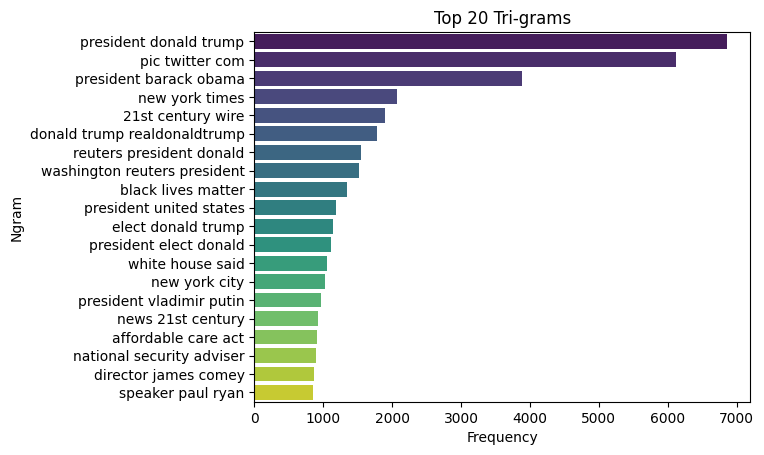

In [26]:
plot_top_ngrams(news_df['text'], n=3, top_n=20)

### Word Clouds for most frequent words

#### Word Clouds for Real news

In [27]:
real_text = ' '.join(news_df[news_df['label']== 1]['text'])

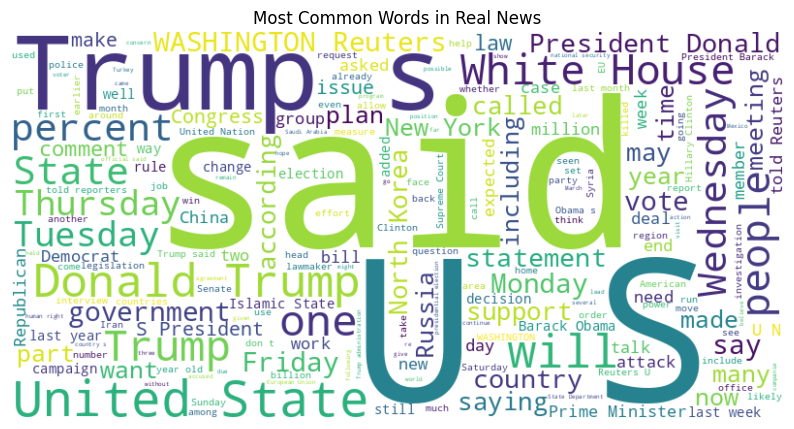

In [28]:
# WordCloud for real news
plt.figure(figsize=(10, 6))
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Real News')
plt.show()

#### Word Clouds for Fake News

In [29]:
fake_text = ' '.join(news_df[news_df['label']== 0]['text'])

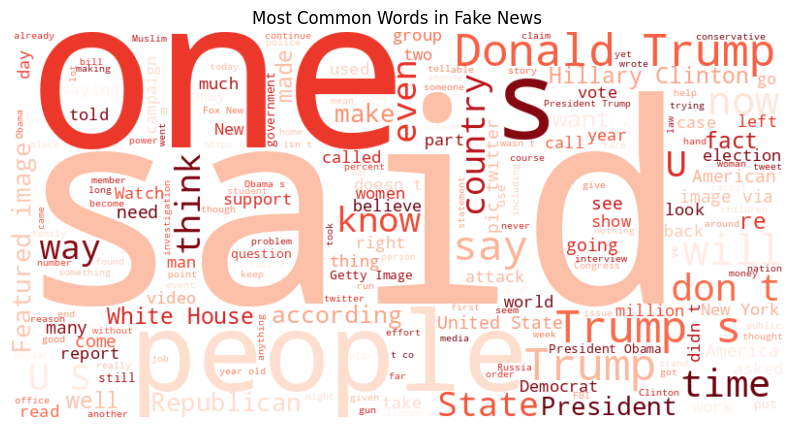

In [30]:
# WordCloud for real news
plt.figure(figsize=(10, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', colormap= 'Reds').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Fake News')
plt.show()

## Text Preprocessing

### Importing libraries

In [31]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

### Defining function for Preprocessing Text

In [32]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [33]:
# Lowercasing, removing punctuation, tokenization, and lemmatization
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(lemmatized_tokens)

### Preprocess text using UDF

In [34]:
# applying preprocess_text function to text column

news_df['text'] = news_df['text'].apply(preprocess_text)

In [35]:
news_df.head()

,title,text,subject,date,label,text_length,sentiment
0,Donald Trump Sends Out Embarrassing New Year...,donald trump wish american happy new year leav...,News,"December 31, 2017",0,2893,0.082132
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0,1898,-0.005004
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017",0,3597,-0.012345
3,Trump Is So Obsessed He Even Has Obamas Name...,christmas day donald trump announced would bac...,News,"December 29, 2017",0,2774,-0.023118
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",0,2346,-0.011722


In [36]:
# Saving preprocessed dataframe as csv file 

news_df.iloc[:,0:5].to_csv('news.csv', index= False)

## Model Building and Evaluation

### Importing Libraries

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier

### Transforming Text Data

In [38]:
# Initialize TF-IDF vectorizer

vectorizer = TfidfVectorizer(max_features= 5000)

# Selecting feature and target variable

X = vectorizer.fit_transform(news_df['text'])
y = news_df['label']


### Split data into training and testing sets

In [39]:
# splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

# Display the sizes of training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (35734, 5000)
Testing set size: (8934, 5000)


### UDF for evaluation of models

In [40]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy = ',accuracy_score(y_test, y_pred))
    print('Precision =',precision_score(y_test, y_pred))
    print('Recall =',recall_score(y_test, y_pred))
    print('F1-Score =',f1_score(y_test, y_pred))
    print(f'\nClassification Report :-')
    print(f'{classification_report(y_test,y_pred)}')
    print(f'\nConfusion Matrix :-')
    cm = confusion_matrix(y_test,y_pred, labels=[0,1])
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Fake News(0)','Real News(1)'], yticklabels=['Fake News(0)','Real News(1)'], cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Multinomial Naive Bayes Model

Accuracy =  0.943698231475263
Precision = 0.9400189663347558
Recall = 0.9406880189798339
F1-Score = 0.9403533736511325

Classification Report :-
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4719
           1       0.94      0.94      0.94      4215

    accuracy                           0.94      8934
   macro avg       0.94      0.94      0.94      8934
weighted avg       0.94      0.94      0.94      8934


Confusion Matrix :-


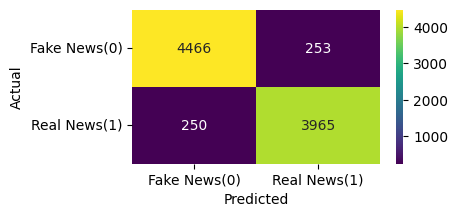

In [41]:
# Initializing Multinommmial Naive Bayes model 
mnb = MultinomialNB()

# Fitting the model with the training features and labels
mnb.fit(X_train, y_train)

# Evaluating Model on testing data
evaluate_model(mnb,X_test,y_test)

### Logistic Regression Model

Accuracy =  0.9921647638235953
Precision = 0.9907648591049018
Recall = 0.9926453143534995
F1-Score = 0.9917041953069448

Classification Report :-
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4719
           1       0.99      0.99      0.99      4215

    accuracy                           0.99      8934
   macro avg       0.99      0.99      0.99      8934
weighted avg       0.99      0.99      0.99      8934


Confusion Matrix :-


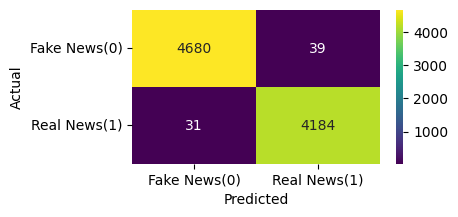

In [42]:
# Initializing LogisticRegression model 
lr = LogisticRegression(random_state= 42)

# Fitting the model with the training features and labels
lr.fit(X_train, y_train)

# Evaluating Model on testing data
evaluate_model(lr,X_test,y_test)

### Randomforest Classifier Model

Accuracy =  0.9989926124916051
Precision = 0.9990507831039392
Recall = 0.9988137603795967
F1-Score = 0.9989322576818128

Classification Report :-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4719
           1       1.00      1.00      1.00      4215

    accuracy                           1.00      8934
   macro avg       1.00      1.00      1.00      8934
weighted avg       1.00      1.00      1.00      8934


Confusion Matrix :-


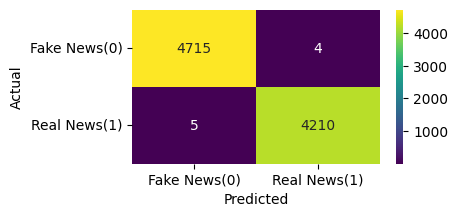

In [43]:
# Initializing RandomForestClassifier model 
rfc = RandomForestClassifier(random_state= 42, class_weight= 'balanced')

# Fitting the model with the training features and labels
rfc.fit(X_train, y_train)

# Evaluating Model on testing data
evaluate_model(rfc,X_test,y_test)

### LightGBM Classifier Model

[LightGBM] [Info] Number of positive: 16996, number of negative: 18738
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.689502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779226
[LightGBM] [Info] Number of data points in the train set: 35734, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy =  0.9984329527647191
Precision = 0.9981029167654731
Recall = 0.998576512455516
F1-Score = 0.9983396584440227

Classification Report :-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4719
           1       1.00      1.00      1.00      4215

    accuracy                           1.00      8934
   macro avg       1.00      1.00      1.00      8934
weighted avg       1.00      1.00      1.00      8934


Confusion Matrix :-


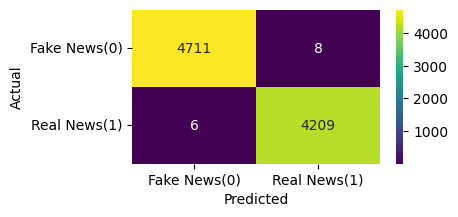

In [44]:
# Initializing LGBM Classifier model 
lgbm = LGBMClassifier(random_state= 42, class_weight='balanced')

# Fitting the model with the training features and labels
lgbm.fit(X_train, y_train)

# Evaluating Model on testing data
evaluate_model(lgbm,X_test,y_test)

### Models Performance comparison

#### Defining UDF for creating matrics table for comparison

In [45]:
# Create an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

# Function to evaluate model performance and append to the DataFrame
def metrics_table(name, model, X_test, y_test, metrics_df):
    # Predict the test data
    y_pred = model.predict(X_test)
    
    # Get predicted probabilities for AUC (if available)
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    except:
        auc = None  # For models without `predict_proba()`
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metrics to the DataFrame
    new_row = pd.DataFrame({
    'Model': [name],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1] ,
    'AUC': [auc] })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
    
    return metrics_df

#### Storing evaluated metrices to the metrics table

In [46]:
# Defining Models dictionary
models = {
    'Multinomial Naive Bayes' : mnb,
    'Logistic Regression' : lr,
    'Random Forest Classifier' : rfc,
    'LGBM Classifier' : lgbm
}

#### Performance metrics comparison 

In [47]:
# Storing metrics in the metrics table
metrics_df = metrics_df[0:0]
for model_name,model in models.items():
    metrics_df = metrics_table(model_name,model,X_test,y_test,metrics_df)

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Multinomial Naive Bayes,0.943698,0.940019,0.940688,0.940353,0.984370
1,Logistic Regression,0.992165,0.990765,0.992645,0.991704,0.999363
2,Random Forest Classifier,0.998993,0.999051,0.998814,0.998932,0.999968
3,LGBM Classifier,0.998433,0.998103,0.998577,0.998340,0.999853


#### Confusion Matrices comparison

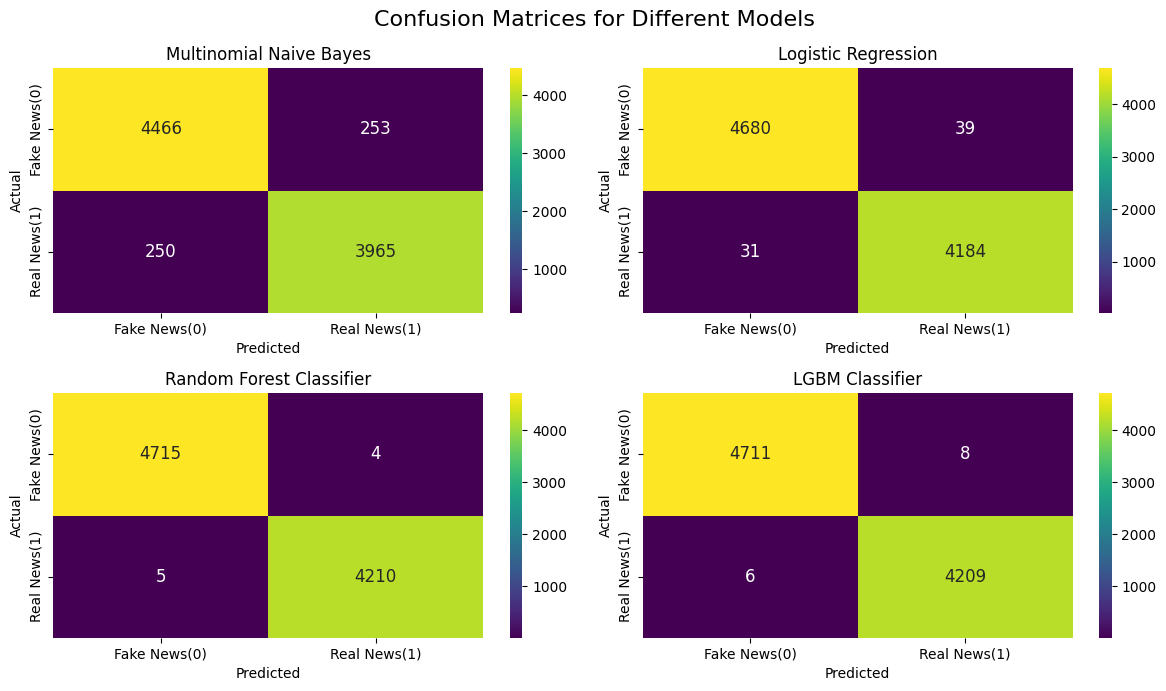

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12,7))
fig.suptitle('Confusion Matrices for Different Models', fontsize=16)
i = 0
j = 0
for name,model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred, labels=[0,1])
    sns.heatmap(cm, annot=True, fmt="d", annot_kws={'size': 12}, xticklabels=['Fake News(0)','Real News(1)'], yticklabels=['Fake News(0)','Real News(1)'], cmap='viridis', ax= axes[i,j])
    axes[i,j].set_title(name)
    axes[i,j].set_xlabel('Predicted')
    axes[i,j].set_ylabel('Actual')
    j += 1
    if j == 2 :
        i += 1
        j = 0
plt.tight_layout()
plt.show()

#### **Insights from Model Performance and Confusion Matrices:**

1. **Top-Performing Models**:
   - **Random Forest Classifier** leads with the highest accuracy (99.90%) and AUC (0.999968), showcasing its superior ability to classify real and fake news. Its confusion matrix indicates near-perfect results, with just **4 false positives** and **5 false negatives**.
   - **LGBM Classifier** follows closely, achieving 99.84% accuracy and an AUC of 0.999853. The confusion matrix reveals **8 false positives** and **6 false negatives**, confirming its robust performance.

2. **General Model Strength**:
   - All models demonstrate high precision, recall, and F1-scores, consistently exceeding 99%. These results highlight their effectiveness in minimizing misclassifications, as illustrated in the confusion matrices.

3. **Logistic Regression**:
   - With an accuracy of 99.21% and AUC of 0.999363, Logistic Regression offers strong performance but trails behind ensemble models. Its confusion matrix reflects **39 false positives** and **31 false negatives**, a notable gap compared to the best-performing models.

4. **Multinomial Naive Bayes**:
   - This model achieves the lowest accuracy (94.37%) and AUC (0.984370). The confusion matrix shows **253 false positives** and **250 false negatives**, making it less effective compared to other models.

5. **Key Observations**:
   - Ensemble methods (Random Forest and LGBM) consistently outperform other models with lower misclassification rates.
   - Logistic Regression, while efficient, is better suited for scenarios where interpretability and simplicity are prioritized over slight accuracy gains.

#### **Recommendation:**
- **Random Forest Classifier** is the most reliable option for deployment, offering exceptional accuracy, AUC, and minimal classification errors. It should be prioritized for real-world applications.

#### ROC-Curve for the Best Model (Random Forest Classifier Model)

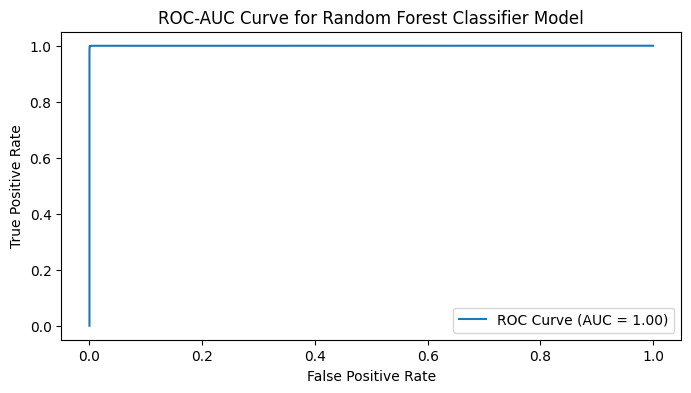

In [49]:
# ROC-AUC Curve
plt.figure(figsize=(8, 4))
y_proba = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label= f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.title("ROC-AUC Curve for Random Forest Classifier Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Model Deployment

### Creating Pkl file for model deployment

In [50]:
import pickle

# Save the trained model
model = rfc
filename = 'random_forest_model.pkl'
pickle.dump(model, open(filename, 'wb'))

filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))